In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

# Excercices

## Exercise 1

- Combine all provided data adequately into a single, tidy data set (e.g. by merging, concatenating
or reshaping the data) such that you are able to answer the subsequent questions.
- Explain your steps in a few sentences. How do you combine the data? What are the main challenges? How do you deal with them and why in this way?

In [21]:
# Get a list of all CSV files in the data directory
csv_files = glob.glob('../data/results_*.csv')

dataframes = []
for file in csv_files:
    df_results_year = pd.read_csv(file)
    year = file.split('/')[-1].split('.')[0].split('_')[1]
    df_results_year['year'] = year
    dataframes.append(df_results_year)

df_results = pd.concat(objs=dataframes)
df_results.loc[df_results.position=='Fourty-Two', 'position'] = 42

df_results['athlete_id'] = df_results['athlete_id'].astype(int)
df_results['position'] = pd.to_numeric(df_results['position'], errors='raise')
df_results['year'] = pd.to_numeric(df_results['year'], errors='raise')

df_results

,athlete_id,season,sport,event,position,medal,country,team,year
0,13139,Winter,Speed Skating,"3,000 metres, Women",9.0,NaN,Canada,NaN,2006
1,13139,Winter,Speed Skating,"5,000 metres, Women",1.0,Gold,Canada,NaN,2006
2,13139,Winter,Speed Skating,"Team Pursuit (6 laps), Women",2.0,Silver,Canada,Canada,2006
3,65547,Winter,Bobsleigh,"Four, Men",25.0,NaN,Brazil,Brazil,2006
4,71212,Winter,Bobsleigh,"Four, Men",24.0,NaN,Hungary,Hungary,2006
...,...,...,...,...,...,...,...,...,...
13741,136663,Summer,Athletics,"5,000 metres, Men",NaN,NaN,Somalia,NaN,2016
13742,136664,Summer,Athletics,"5,000 metres, Men",NaN,NaN,Eritrea,NaN,2016
13743,140789,Summer,Hockey,"Hockey, Men",NaN,NaN,Australia,Australia,2016
13744,141524,Summer,Hockey,"Hockey, Men",NaN,NaN,Canada,Canada,2016


```
All results csv files have been read. An aditional year column has been added to each dataframe. The dataframes have been concatenated into a single dataframe. The data has been cleaned and the data types have been changed to the appropriate types: 
    - athlete_id and position have been changed to numeric
    - year has been changed to datetime 

There is a single case of extrange data in the position column, the value was 'Fourty-Two'. As is the only case, it was been changed manually to 42.
```
---

In [22]:
df_metadata_athletes = pd.read_excel('../data/metadata.xlsx', sheet_name='athletes')

df_metadata_athletes.set_index('athlete_id', inplace=True)
names = df_metadata_athletes['name'].str.split('•', n=1, expand=True)
df_metadata_athletes['first_name'] = names[0]
df_metadata_athletes['last_name'] = names[1]
df_metadata_athletes.drop('name', axis=1, inplace=True)

df_metadata_athletes['born'] = pd.to_datetime(df_metadata_athletes['born'], errors='raise')

df_metadata_athletes

,sex,measurements,born,died,affiliations,first_name,last_name
athlete_id,,,,,,,
7,Male,180 cm / 73 kg,1969-11-27,NaN,Espérance de Reuilly / Levallois SCTT / Royal ...,Patrick,Chila
15,Male,165 cm / 58 kg,1969-07-04,NaN,"Caen TTC, Caen (FRA) / SAG Cestas, Cestas (FRA...",Damien,Éloi
27,Male,177 cm / 75 kg,1973-08-06,NaN,"Levallois SC, Levallois-Perret (FRA) / Istres ...",Christophe,Legoût
132,Female,180 cm / 68 kg,1973-07-19,NaN,TSG Dülmen / Bayer Uerdingen / SV Winterwerb /...,Elke,Schall-Wosik
179,Male,169 cm / 62 kg,1972-03-08,NaN,"Finower TTC, GER / TTF Liebherr Ochsenhausen E...",Kallinikos,Kreangka
...,...,...,...,...,...,...,...
138428,Female,165 cm / 64 kg,1996-05-04,NaN,Insight School of Colorado,Arielle,Gold
138429,Female,170 cm / 65 kg,1989-03-16,NaN,"Harbin Curling Club, Harbin (CHN) / ?, Heilong...",Liu,Jinli
140789,Male,186 cm / 85 kg,1995-09-03,NaN,"NSW Pride, Sydney (AUS)",Tom,Craig


```
Athlete information has been read from metadata's excel. Name column has been split into first and last name. The data has been cleaned and the data types have been changed to the appropriate types: 
    - born has been changed to datetime

athlete_id has been set as index, later this will be useful.
```

---

In [23]:
df_metadata_games = pd.read_excel('../data/metadata.xlsx', sheet_name='games')

df_metadata_games.drop([0,1], inplace=True)
df_metadata_games.columns = df_metadata_games.iloc[0]
df_metadata_games = df_metadata_games.drop(df_metadata_games.index[0])
df_metadata_games.reset_index(drop=True, inplace=True)
df_metadata_games['year'] = pd.to_numeric(df_metadata_games['year'], errors='raise')

df_metadata_games = df_metadata_games.add_prefix("games_",axis=1)
df_metadata_games

2,games_year,games_season,games_city,games_country,games_opened,games_closed
0,1912,Summer,Stockholm,Sweden,1912-07-06,1912-07-27
1,1920,Summer,Antwerpen,Belgium,1920-08-14,1920-08-30
2,1996,Summer,Atlanta,United States,1996-07-19,1996-08-04
3,1924,Summer,Paris,France,1924-07-05,1924-07-27
4,1992,Summer,Barcelona,Spain,1992-07-25,1992-08-09
...,...,...,...,...,...,...
57,2022,Winter,Beijing,People's Republic of China,NaN,NaN
58,2024,Summer,Paris,France,NaN,NaN
59,2026,Winter,Milano-Cortina d'Ampezzo,Italy,NaN,NaN
60,2028,Summer,Los Angeles,United States,NaN,NaN


```
Olympic games information has been read from metadata's excel. The prefix 'games_' has been added to the columns. The data has been cleaned and the data types have been changed to the appropriate types: 
    - year has been changed to numeric

The results data contais information about the olympic games from 2006 to 2016. This olympic games metadata contains information from 1912 to 2032 (with some missing values). One of the missing values is 2008, although is easy to look up the information, it has not been included in the dataframe because I believe we should face the metadata as it is and face the missing values as a challenge to solve.
```
---

In [24]:
df_athletes = pd.merge(left=df_results, right=df_metadata_athletes, how='left', left_on='athlete_id', right_index=True)
df_athletes

,athlete_id,season,sport,event,position,medal,country,team,year,sex,measurements,born,died,affiliations,first_name,last_name
0,13139,Winter,Speed Skating,"3,000 metres, Women",9.0,NaN,Canada,NaN,2006,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...,Clara,Hughes
1,13139,Winter,Speed Skating,"5,000 metres, Women",1.0,Gold,Canada,NaN,2006,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...,Clara,Hughes
2,13139,Winter,Speed Skating,"Team Pursuit (6 laps), Women",2.0,Silver,Canada,Canada,2006,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...,Clara,Hughes
3,65547,Winter,Bobsleigh,"Four, Men",25.0,NaN,Brazil,Brazil,2006,Male,186 cm / 88 kg,1970-11-19,NaN,Funilense/Reebok,Claudinei,da Silva
4,71212,Winter,Bobsleigh,"Four, Men",24.0,NaN,Hungary,Hungary,2006,Male,188 cm / 88 kg,1971-03-21,NaN,"TFSE, Budapest (HUN) / Pécsi VSK, Pécs (HUN)",Zsolt,Kürtösi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13741,136663,Summer,Athletics,"5,000 metres, Men",NaN,NaN,Somalia,NaN,2016,Male,NaN,1996-03-01,NaN,NaN,Mohamed,Mohamed
13742,136664,Summer,Athletics,"5,000 metres, Men",NaN,NaN,Eritrea,NaN,2016,Male,NaN,1998-02-20,NaN,NaN,Aron,Kifle
13743,140789,Summer,Hockey,"Hockey, Men",NaN,NaN,Australia,Australia,2016,Male,186 cm / 85 kg,1995-09-03,NaN,"NSW Pride, Sydney (AUS)",Tom,Craig
13744,141524,Summer,Hockey,"Hockey, Men",NaN,NaN,Canada,Canada,2016,Male,NaN,1988-05-16,NaN,"West Vancouver FHC, West Vancouver (CAN)",Antoni,Kindler


```
Results information has been joined with the athlete metadata. A left join has been made because information about an athlete without results is not valuable in this dataframe. 
```
---

In [25]:
df = pd.merge(left=df_athletes, right=df_metadata_games, how='left', left_on='year', right_on='games_year')
df.drop('games_year', axis=1, inplace=True)
df.drop('games_season', axis=1, inplace=True)
df

,athlete_id,season,sport,event,position,medal,country,team,year,sex,measurements,born,died,affiliations,first_name,last_name,games_city,games_country,games_opened,games_closed
0,13139,Winter,Speed Skating,"3,000 metres, Women",9.0,NaN,Canada,NaN,2006,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...,Clara,Hughes,Torino,Italy,2006-02-10,2006-02-26
1,13139,Winter,Speed Skating,"5,000 metres, Women",1.0,Gold,Canada,NaN,2006,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...,Clara,Hughes,Torino,Italy,2006-02-10,2006-02-26
2,13139,Winter,Speed Skating,"Team Pursuit (6 laps), Women",2.0,Silver,Canada,Canada,2006,Female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...,Clara,Hughes,Torino,Italy,2006-02-10,2006-02-26
3,65547,Winter,Bobsleigh,"Four, Men",25.0,NaN,Brazil,Brazil,2006,Male,186 cm / 88 kg,1970-11-19,NaN,Funilense/Reebok,Claudinei,da Silva,Torino,Italy,2006-02-10,2006-02-26
4,71212,Winter,Bobsleigh,"Four, Men",24.0,NaN,Hungary,Hungary,2006,Male,188 cm / 88 kg,1971-03-21,NaN,"TFSE, Budapest (HUN) / Pécsi VSK, Pécs (HUN)",Zsolt,Kürtösi,Torino,Italy,2006-02-10,2006-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54271,136663,Summer,Athletics,"5,000 metres, Men",NaN,NaN,Somalia,NaN,2016,Male,NaN,1996-03-01,NaN,NaN,Mohamed,Mohamed,Rio de Janeiro,Brazil,2016-08-05,2016-08-21
54272,136664,Summer,Athletics,"5,000 metres, Men",NaN,NaN,Eritrea,NaN,2016,Male,NaN,1998-02-20,NaN,NaN,Aron,Kifle,Rio de Janeiro,Brazil,2016-08-05,2016-08-21
54273,140789,Summer,Hockey,"Hockey, Men",NaN,NaN,Australia,Australia,2016,Male,186 cm / 85 kg,1995-09-03,NaN,"NSW Pride, Sydney (AUS)",Tom,Craig,Rio de Janeiro,Brazil,2016-08-05,2016-08-21
54274,141524,Summer,Hockey,"Hockey, Men",NaN,NaN,Canada,Canada,2016,Male,NaN,1988-05-16,NaN,"West Vancouver FHC, West Vancouver (CAN)",Antoni,Kindler,Rio de Janeiro,Brazil,2016-08-05,2016-08-21


```
Athlete information has been joined with each olympic game information. A left join has been made because this is a dataframe with information about athletes and the olympic games they have participated in, not information about olympic games.
```
---

- Sort the data permanently by year, sport, event and position. Then display the first 3 rows and
the last 3 rows of the data set and print the number of rows and columns

In [26]:
df.sort_values(['year','sport','event','position'], inplace=True)

display(df.head(3))
display(df.tail(3))
# display(pd.concat([df.head(3), df.tail(3)]))

print(f"Number of rows {df.shape[0]}")
print(f"Number of columns {df.shape[1]}")

,athlete_id,season,sport,event,position,medal,country,team,year,sex,measurements,born,died,affiliations,first_name,last_name,games_city,games_country,games_opened,games_closed
3231,110095,Winter,Alpine Skiing,"Combined, Men",1.0,Gold,United States,NaN,2006,Male,180 cm / 86 kg,1984-08-31,NaN,"Park City Ski Team, Park City (USA)",Ted,Ligety,Torino,Italy,2006-02-10,2006-02-26
1862,101791,Winter,Alpine Skiing,"Combined, Men",2.0,Silver,Croatia,NaN,2006,Male,182 cm / 88 kg,1979-11-23,NaN,"SK Zagreb, Zagreb (CRO)",Ivica,Kostelić,Torino,Italy,2006-02-10,2006-02-26
1837,101752,Winter,Alpine Skiing,"Combined, Men",3.0,Bronze,Austria,NaN,2006,Male,176 cm / 88 kg,1977-06-13,NaN,"SC Petzen, Bleiburg (AUT)",Rainer,Schönfelder,Torino,Italy,2006-02-10,2006-02-26


,athlete_id,season,sport,event,position,medal,country,team,year,sex,measurements,born,died,affiliations,first_name,last_name,games_city,games_country,games_opened,games_closed
42470,117165,Summer,Wrestling,"Welterweight, Greco-Roman, Men",16.0,NaN,Hungary,NaN,2016,Male,172 cm / 75 kg,1986-12-20,NaN,Ceglédi VSE,Tamás,Lőrincz,Rio de Janeiro,Brazil,2016-08-05,2016-08-21
52352,134915,Summer,Wrestling,"Welterweight, Greco-Roman, Men",17.0,NaN,Kyrgyzstan,NaN,2016,Male,170 cm / 66 kg,1991-07-16,NaN,"Berkut [Bishkek, KGZ]",Ruslan,Tsarev,Rio de Janeiro,Brazil,2016-08-05,2016-08-21
50950,133610,Summer,Wrestling,"Welterweight, Greco-Roman, Men",18.0,NaN,Egypt,NaN,2016,Male,160 cm / 66 kg,1993-06-27,NaN,NaN,Adham,Saleh,Rio de Janeiro,Brazil,2016-08-05,2016-08-21


Number of rows 54276
Number of columns 20


## Exercise 2

- Which woman won the Gold medal in the 100 meters race of the 2012 olympic games?

In [27]:
gold_medal_2012_100m_women = df[(df.year==2012) & (df.sport=='Athletics') &  (df.event=='100 metres, Women') & (df.medal=='Gold')]
print(f"The gold medalist in 2012 in the 100m women was {gold_medal_2012_100m_women.first_name.values[0]} {gold_medal_2012_100m_women.last_name.values[0]}")

The gold medalist in 2012 in the 100m women was Shelly-Ann Fraser-Pryce


- Which athlete has won the most gold medals, considering only athletes from the following countries:
“Jamaica”, “Trinidad and Tobago”, “Barbados”, “Grenada”, “Saint Kitts and Nevis”?

In [42]:
country_list = ["Jamaica", "Trinidad and Tobago", "Barbados", "Grenada", "Saint Kitts and Nevis"]
athlete_id_most_medals = df[(df.medal=='Gold') & (df.country.isin(country_list))].value_counts('athlete_id').nlargest(1).index[0]
athlete_name = df_metadata_athletes.loc[athlete_id_most_medals, ['first_name', 'last_name']]

print(f"The name of the athlete with most gold medals is {athlete_name.first_name} {athlete_name.last_name}")
print(f"The number of gold medals is {df[(df.athlete_id==athlete_id_most_medals) & (df.medal=='Gold')].shape[0]}")
print("The events are:")
df[(df.athlete_id==athlete_id_most_medals) & (df.medal=='Gold')][['first_name', 'last_name', 'medal','event', 'year']]

The name of the athlete with most gold medals is Usain Bolt
The number of gold medals is 8
The events are:


,first_name,last_name,medal,event,year
7904,Usain,Bolt,Gold,"100 metres, Men",2008
7905,Usain,Bolt,Gold,"200 metres, Men",2008
24030,Usain,Bolt,Gold,"100 metres, Men",2012
24031,Usain,Bolt,Gold,"200 metres, Men",2012
24032,Usain,Bolt,Gold,"4 × 100 metres Relay, Men",2012
41060,Usain,Bolt,Gold,"100 metres, Men",2016
41061,Usain,Bolt,Gold,"200 metres, Men",2016
41062,Usain,Bolt,Gold,"4 × 100 metres Relay, Men",2016


- What was the best position, worst position, and average position achieved by athletes from “Nepal”?

In [29]:
df_nepal = df[(df.country=='Nepal')]

print(f"The best position for Nepal's athelets was {df_nepal.position.min(numeric_only=True)}")
print(f"The worst position for Nepal's athelets was {df_nepal.position.max(numeric_only=True)}")
print(f"The average position for Nepal's athelets was {df_nepal.position.mean(numeric_only=True)}")

The best position for Nepal's athelets was 7.0
The worst position for Nepal's athelets was 94.0
The average position for Nepal's athelets was 47.77777777777778


## Exercise 3

- Visualize how the number of participants has changed over the years. Create a single figure with one
subplot for the summer games and one subplot for the winter games.

Note: If a single athlete participates at multiple events at a given olympic game, then count this athlete
only once. For instance, Usain Bolt partcipated at three events (100 meters, 200 meters, and 4x100
meters relay) in the 2016 olympic games. He should be counted only as one participant, not as three
participants.

Setting both subplots to have the same y-axis limits makes no sense, as we were told to separate the data by season in the two diferent graphs.


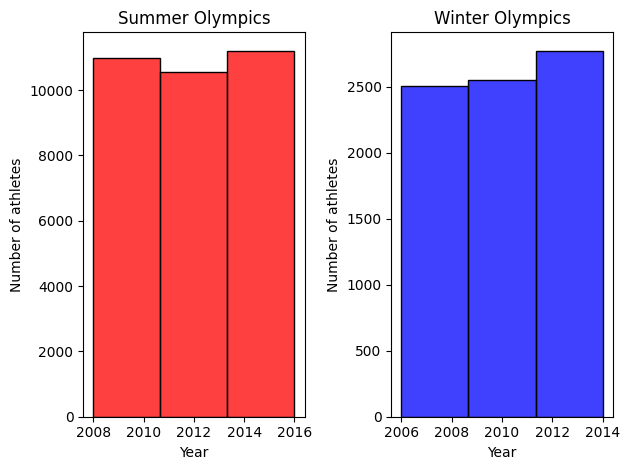

In [69]:
fig, ax = plt.subplots(ncols=2,nrows=1)

df_once = df[['year','athlete_id','season']].drop_duplicates()

sns.histplot(data=df_once[(df_once.season=="Summer")],x='year',ax=ax[0], bins=df_once[(df_once.season=="Summer")].year.nunique(), color='red')
sns.histplot(data=df_once[(df_once.season=="Winter")],x='year',ax=ax[1], bins=df_once[(df_once.season=="Winter")].year.nunique(), color='blue')

ax[0].set_title('Summer Olympics')
ax[1].set_title('Winter Olympics')

ax[0].set_xlabel('Year')
ax[1].set_xlabel('Year')

ax[0].set_ylabel('Number of athletes')
ax[1].set_ylabel('Number of athletes')

fig.tight_layout()

print("Setting both subplots to have the same y-axis limits makes no sense, as we were told to separate the data by season in the two diferent graphs.") 

## Exercise 4


 - Which lastname is the most common among the athletes of the 2016 olympic games, and how often does this name occur?

In [31]:
most_common_last_name = df[df.year==2016][['last_name']].value_counts().nlargest(1)
print(f"The most common last name in the 2016 Olympics was {most_common_last_name.index[0][0]} with {most_common_last_name.values[0]} athletes")

The most common last name in the 2016 Olympics was López with 33 athletes


## Exercise 5

- Which are the 5 sports with the highest average age of gold medal winners? Provide the sport and the average age.

Note: We define age as the number of years between the athlete’s birth and the opening date of the olympic games.

In [32]:
df['age'] = df['year'].astype(int) - df.born.dt.year
older_average_gold_medalists = df[df.medal=='Gold'][['age','sport']].groupby('sport').age.mean().nlargest(5)

print("The sports with the oldest average gold medalists are:")
for sport in older_average_gold_medalists.index: 
    print(f"\t{sport:<20} with an average age of {older_average_gold_medalists[sport]:.2f}")

The sports with the oldest average gold medalists are:
	Equestrian Jumping   with an average age of 42.53
	Equestrian Eventing  with an average age of 37.82
	Equestrian Dressage  with an average age of 36.23
	Curling              with an average age of 33.81
	Cycling Road         with an average age of 32.25


## Exercise 6

- Calculate the medal table for the olympic games 2016. See the [official medal table](https://en.wikipedia.org/wiki/2016_Summer_Olympics_medal_table#Medal_table) as a reference. Your
medal table should have the same structure (same column names and same sorting) as the official medal
table. Display the top 10 countries.

Hint: In team events such as Basketball, all team members of the winning team receive a gold medal,
but for the medal table it should only count as one gold medal. The same logic also applies to silver and
bronze medals. You can recognize team events either via the column team (which is then non-missing)
or by the fact that multiple athletes of a country have won the same medal in a single competition.


In [87]:
def create_medal_table(year):
    df_medal_table = pd.DataFrame(columns=['Gold', 'Silver', 'Bronze', 'Total'])
    
    df_medal_table['Gold'] = df[(df.year == year) & (df.medal == 'Gold')][['sport', 'event', 'medal', 'country']].drop_duplicates().value_counts('country')
    df_medal_table['Silver'] = df[(df.year == year) & (df.medal == 'Silver')][['sport', 'event', 'medal', 'country']].drop_duplicates().value_counts('country')
    df_medal_table['Bronze'] = df[(df.year == year) & (df.medal == 'Bronze')][['sport', 'event', 'medal', 'country']].drop_duplicates().value_counts('country')
    df_medal_table.infer_objects(copy=False).fillna(0, inplace=True)
    
    df_medal_table['Total'] = df_medal_table['Gold'] + df_medal_table['Silver'] + df_medal_table['Bronze']
    
    df_medal_table = df_medal_table.astype(int)

    df_medal_table.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False, inplace=True)

    df_medal_table.reset_index(inplace=True)
    df_medal_table['Rank'] = np.arange(1, df_medal_table.shape[0]+1)
    df_medal_table.set_index('Rank', inplace=True)
    
    return df_medal_table

df_medal_table_2016 = create_medal_table(year=2016)
df_medal_table_2016.head(10)

,country,Gold,Silver,Bronze,Total
Rank,,,,,
1,United States,46,37,38,121
2,Great Britain,27,23,17,67
3,People's Republic of China,26,18,26,70
4,Russian Federation,19,17,20,56
5,Germany,17,10,15,42
6,Japan,12,8,21,41
7,France,10,18,14,42
8,Republic of Korea,9,3,9,21
9,Italy,8,12,8,28
